## LDA（Latent Dirichlet Allocation）

LDA（Latent Dirichlet Allocation）是一种非常流行的文本主题模型。它可以从大量的文本文档中发现潜在的主题。

以下是LDA模型的基本原理：

1. **假设**:
    - 文档是由主题的混合所产生的。
    - 主题是词的分布。
    - 每个文档都可以由一组主题的混合表示，其中每个主题都有一个权重。

2. **文档生成过程**:
    LDA假设每篇文档的生成遵循以下过程：
    - 选择文档的长度。
    - 选择一个主题的混合（例如，主题A的权重为30%，主题B的权重为70%）。
    - 对于文档中的每一个词：
        - 选择一个主题（基于文档的主题混合）。
        - 从该主题的分布中选择一个词。

3. **反向工程**:
    在实际应用中，我们已经有了文档，目标是找出主题。LDA的任务是反向工程这个生成过程，找出每篇文档的主题混合以及每个主题的词分布。

4. **Dirichlet分布**:
    LDA中的"D"指的是Dirichlet分布，它是用于描述主题混合和词分布的先验概率分布。在实际应用中，Dirichlet分布有助于平滑主题和词分布。

5. **参数估计**:
    LDA使用变分推断或吉布斯抽样来估计模型参数。这些方法都试图最大化观测到的文档和词在给定主题、词分布和主题混合下的联合概率。

6. **输出**:
    LDA的输出包括每个文档的主题混合和每个主题的词分布。

#### 缺点
1.主题个数是个超参，需要事先指定

2.使用 bag-of-words 去表示文本，忽略了词的顺序和深层次的语义，表征能力有限

3.stopwords/stemming/lemmatization，都要处理，这也是 bag-of-words 带来的缺点

In [ ]:
import pandas as pd
import jieba


df = pd.read_csv('明星信息.csv', encoding='utf-8')


df.dropna(subset=['judge'], inplace=True)

stopwords = [line.strip() for line in open('停用词表.txt',encoding='UTF-8').readlines()]


def jieba_cut_remove_stopwords(text):
    """结巴分词，并去除停用词
    """
    words = jieba.lcut(text)
    results = []
    for word in words:
        # 去除停用词和空元素
        if word not in stopwords and word.strip():
            results.append(word)
    return ' '.join(results)

df['judge_cut'] = df["judge"].apply(lambda x:jieba_cut_remove_stopwords(str(x)))

df.to_csv('明星信息1.csv', encoding='utf-8')

In [2]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
import jieba


df = pd.read_csv('明星信息1.csv', encoding='utf-8')

# 2. 预处理数据

# 分词


texts = [[word for word in text.split(' ') ] for text in df['judge_cut']]
# print(texts)
# 构建词典
dictionary = corpora.Dictionary(texts)

# 使用上面的词典，将转换文档列表（语料）变成 DT 矩阵
corpus = [dictionary.doc2bow(text) for text in texts]

texts, dictionary, corpus


# 3. 训练模型
lda_model = LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# 4. 展示结果
topics = lda_model.print_topics(num_words=5)
topics


[(0, '0.017*"电影" + 0.008*"中" + 0.006*"导演" + 0.005*"评" + 0.004*"中国"'),
 (1, '0.008*"中国" + 0.006*"中" + 0.005*"评" + 0.004*"说" + 0.004*"齐达内"'),
 (2, '0.010*"电影" + 0.009*"中" + 0.009*"评" + 0.005*"时" + 0.005*"观众"'),
 (3, '0.018*"评" + 0.011*"中" + 0.008*"电影" + 0.005*"娱乐" + 0.005*"角色"'),
 (4, '0.029*"评" + 0.020*"中" + 0.010*"角色" + 0.009*"观众" + 0.008*"表演"'),
 (5, '0.015*"评" + 0.014*"中" + 0.005*"娱乐" + 0.004*"形象" + 0.004*"角色"'),
 (6, '0.012*"贺敬之" + 0.008*"中" + 0.006*"评" + 0.006*"中国" + 0.005*"评价"'),
 (7, '0.011*"中" + 0.009*"评" + 0.009*"节目" + 0.006*"主持" + 0.005*"年"'),
 (8, '0.021*"评" + 0.014*"中" + 0.006*"演员" + 0.005*"娱乐" + 0.005*"表演"'),
 (9, '0.013*"评" + 0.012*"中" + 0.007*"音乐" + 0.005*"演员" + 0.004*"娱乐"')]

In [59]:
###查看每个文档主题分布
import pandas as pd

doc_topic_distributions = [lda_model[bow] for bow in corpus]
fixed_distributions = []

for distribution in doc_topic_distributions:
    fixed_distribution = [0] * lda_model.num_topics
    for topic_id, prob in distribution:
        fixed_distribution[topic_id] = prob
    fixed_distributions.append(fixed_distribution)



# Convert the fixed_distributions list into a DataFrame
df = pd.DataFrame(fixed_distributions, columns=[f"Topic_{i}" for i in range(lda_model.num_topics)])

df.head()  # Display the first few rows of the dataframe for review


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,0.000000,0.0,0.736969,0.0,0.000000,0.0,0.0,0.000000,0.0,0.260547
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.981585,0.0,0.000000
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.994537
3,0.000000,0.0,0.990067,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,0.678995,0.0,0.000000,0.0,0.184383,0.0,0.0,0.000000,0.0,0.132638


In [60]:
# from gensim.models.ldamodel import LdaModel
# lda_model.save('my_lda_model')
# lda_model = LdaModel.load('my_lda_model')

## 模型评估：


Coherence：这是一个常用的指标，用于评估主题模型的质量。一个高的 coherence 分数意味着在一个主题内的词汇之间有很强的语义关系，这通常意味着该主题是有意义的。

Diversity：这是指主题之间的差异性。如果我们有许多相似的主题，那么整体的多样性会降低。理想情况下，我们希望每个主题都是独特和有区分性的。，取值范围[0,1]，0表示主题冗余，1表示更加多样的主题。

In [3]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from collections import defaultdict


# 3. 训练LDA模型
topic_range = list(range(2, 5))
ldamodels = {k: LdaModel(corpus, num_topics=k, id2word=dictionary, passes=15) for k in topic_range}

# 4. 计算Coherence
coherence_values = {}
for k, model in ldamodels.items():
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values[k] = coherence_model.get_coherence()

# 5. 计算Diversity
def compute_diversity(model):
    num_topics = model.num_topics
    topics = [model.show_topic(i) for i in range(num_topics)]
    word_sets = [set([word for word, _ in topic]) for topic in topics]
    
    total_pairs = num_topics * (num_topics - 1) / 2
    overlapping_word_count = sum(len(word_sets[i].intersection(word_sets[j])) for i in range(num_topics) for j in range(i+1, num_topics))
    
    # diversity is defined as 1 minus average overlap
    diversity = 1 - overlapping_word_count / (10 * total_pairs)  # each topic has 10 words by default
    return diversity

diversity_values = {k: compute_diversity(model) for k, model in ldamodels.items()}

coherence_values, diversity_values


({2: 0.46748332852071084, 3: 0.38223937219549436, 4: 0.425892888851095},
 {2: 0.6, 3: 0.4, 4: 0.35})

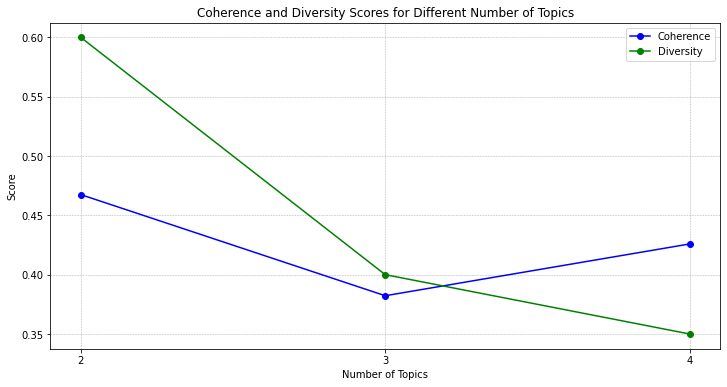

In [4]:
import matplotlib.pyplot as plt

# 绘制Coherence和Diversity值的图表
plt.figure(figsize=(12, 6))

# Coherence折线图
plt.plot(list(coherence_values.keys()), list(coherence_values.values()), '-o', label="Coherence", color='blue')

# Diversity折线图
plt.plot(list(diversity_values.keys()), list(diversity_values.values()), '-o', label="Diversity", color='green')

plt.xlabel("Number of Topics")
plt.ylabel("Score")
plt.title("Coherence and Diversity Scores for Different Number of Topics")
plt.xticks(topic_range)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [55]:
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel


# 训练LDA模型
num_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

# 获取模型的主题词汇
topic_words_list = [lda_model.show_topic(topicid, topn=10) for topicid in range(lda_model.num_topics)]
topic_words_list = [[word for word, _ in topic] for topic in topic_words_list]

# 使用 Gensim 的 CoherenceModel 计算 coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model_lda.get_coherence()

# 计算 diversity
def compute_diversity(topics):
    num_topics = len(topics)
    topic_sets = [set(topic) for topic in topics]
    total_pairs = num_topics * (num_topics - 1) / 2
    overlapping_word_count = sum(len(topic_sets[i].intersection(topic_sets[j])) for i in range(num_topics) for j in range(i+1, num_topics))
    # diversity is defined as 1 minus average overlap
    diversity = 1 - overlapping_word_count / (10 * total_pairs)  # assuming each topic has 10 words
    return diversity

diversity = compute_diversity(topic_words_list)

coherence, diversity

(0.42032030577929663, 0.4)

## Topic2Vec模型

#### 原理：用 Doc2vec 技术，把文档和词都映射到同一个语义向量空间。对文档向量进行聚类，分成不同的簇，每个簇就代表一个主题，同一个簇的文档向量求 average，得到的向量作为该主题的 Topic 表示，再用离该 topic vector 最近的 个词作为该 Topic 的表示。

1.使用 Doc2Vec 创建文档和字的联合向量空间（也称为embedding 嵌入空间）

2.对文档向量使用 UMAP 进行降维

3.使用 HDBSCAN 进行聚类

4.聚类得到的每个簇为一个主题，对同一个簇的所有文档向量求平均，得到该主题的向量

5.每个主题离该主题向量最近的词向量对应的词来作为主题表示


#### 优点
-通过 HDBSCAN 自动发现主题数

-不需要停用词表

-不需要 stemming/lemmatization，因为这里是用 embedding 来表示一个文档，而不是用 bags-of-words

-相比于 bags-of-words，用 embedding 无疑对文本的表征能力更强

-把词、文档、主题都用同一个 embedding 空间表示，能实现一些实用的功能。如搜索一个词的相似词、一个文档的相似文档、输入主题搜索最相关的文档、输入词搜于文档等，由于有向量，这些搜索都能相当丝滑
#### 缺点
一个很有意思的点是。聚类选择的是 HDBSCAN 这种 density-based 的聚类方法，但是在求主题向量时，是从 centroid-based 的角度，即是通过同一簇下的向量求平均得到主题向量，这会导致得到的主题向量是不准确的，从而造成主题表示是不准确的。


In [10]:
from top2vec import Top2Vec
import pandas as pd

df = pd.read_csv('明星信息1.csv', encoding='utf-8')
# documents = [[word for word in text.split(' ') ] for text in df['judge_cut']]
documents = [text for text in df['judge_cut']]

def cut(text):
    return text.split(" ")

model = Top2Vec(documents=documents,
                embedding_model='doc2vec',
                speed="learn",
                workers=8,
                tokenizer=cut)

# 得到主题数
print(f"主题数：{model.get_num_topics()}")

# 文档数量最多的 N 个主题的主题词，主题词得分，主题下的文档数
# topic_words, word_scores, topic_nums = model.get_topics(7)
# print(f"前2主题的主题词：{topic_words}")
# print(f"前2主题的主题词分布：{word_scores}")

2023-08-10 23:06:09,206 - top2vec - INFO - Pre-processing documents for training
2023-08-10 23:06:09,227 - top2vec - INFO - Creating joint document/word embedding
2023-08-10 23:06:15,833 - top2vec - INFO - Creating lower dimension embedding of documents
2023-08-10 23:06:28,151 - top2vec - INFO - Finding dense areas of documents
2023-08-10 23:06:28,468 - top2vec - INFO - Finding topics


主题数：7
前2主题的主题词：[['真的' '做' '把握' '一位' '令人' '充满' '关注' '内心' '强' '前' '扎实' '美女' '合作' '搜狐网'
  '个性' '网友' '低调' '女人' '风格' '演出' '成熟' '感觉' '人民网' '成功' '荧屏' '男人' '里' '明星'
  '外' '突破' '那种' '道' '中' '艺人' '女孩' '梦想' '一种' '经历' '电视' '专业' '外表' '表现' '形象'
  '演' '传统' '阳光' '凤凰网' '带来' '称' '深刻']
 ['多部' '娱乐' '敬业' '精湛' '拥有' '新浪' '活泼' '扮演' '眼神' '新浪网' '演员' '演绎' '功底' '出演'
  '喜剧' '饰演' '清新' '笑容' '甜美' '塑造' '性感' '高' '角色' '身材' '剧中' '话剧' '导演' '女性'
  '网易娱乐' '努力' '凤凰网' '艺人' '淋漓尽致' '众多' '无论是' '突破' '中' '出色' '经典' '爱' '拍'
  '功夫' '评' '演技' '造型' '台湾' '荧屏' '天赋' '评价' '形象']]
前2主题的主题词分布：[[0.99465954 0.9934133  0.98727214 0.9871391  0.98667246 0.98577
  0.9841653  0.98404396 0.9828611  0.9828324  0.98043996 0.98015535
  0.9795731  0.97911155 0.97804546 0.9775733  0.97714055 0.9770751
  0.9750125  0.9749476  0.96922064 0.9686963  0.968486   0.9668024
  0.9652476  0.96513236 0.96493703 0.962173   0.9613473  0.9612657
  0.9605085  0.95959413 0.9587963  0.9585065  0.9571024  0.95673335
  0.95660686 0.956074   0.9556532  0.9551326  0.95350933 

In [ ]:
# from top2vec import Top2Vec

# # 加载模型
# model = Top2Vec.load("my_top2vec")


In [11]:
# 文档数量最多的 N 个主题的主题词，主题词得分，主题下的文档数
topic_words, word_scores, topic_nums = model.get_topics(7)
print(f"前2主题的主题词：{topic_words}")
print(f"前2主题的主题词分布：{word_scores}")

前2主题的主题词：[['真的' '做' '把握' '一位' '令人' '充满' '关注' '内心' '强' '前' '扎实' '美女' '合作' '搜狐网'
  '个性' '网友' '低调' '女人' '风格' '演出' '成熟' '感觉' '人民网' '成功' '荧屏' '男人' '里' '明星'
  '外' '突破' '那种' '道' '中' '艺人' '女孩' '梦想' '一种' '经历' '电视' '专业' '外表' '表现' '形象'
  '演' '传统' '阳光' '凤凰网' '带来' '称' '深刻']
 ['多部' '娱乐' '敬业' '精湛' '拥有' '新浪' '活泼' '扮演' '眼神' '新浪网' '演员' '演绎' '功底' '出演'
  '喜剧' '饰演' '清新' '笑容' '甜美' '塑造' '性感' '高' '角色' '身材' '剧中' '话剧' '导演' '女性'
  '网易娱乐' '努力' '凤凰网' '艺人' '淋漓尽致' '众多' '无论是' '突破' '中' '出色' '经典' '爱' '拍'
  '功夫' '评' '演技' '造型' '台湾' '荧屏' '天赋' '评价' '形象']
 ['出演' '搜狐' '多部' '娱乐' '电视剧' '写真' '演技' '显得' '喜剧' '拥有' '角色' '饰演' '评' '网易娱乐'
  '剧中' '塑造' '话剧' '新浪' '新浪网' '敬业' '清纯' '精湛' '笑容' '淋漓尽致' '眼神' '活泼' '高' '扮演'
  '到位' '经典' '女性' '功底' '功夫' '演员' '清新' '演绎' '影坛' '甜美' '年代' '诠释' '导演' '无论是'
  '性感' '细腻' '香港' '身材' '人物' '天赋' '感' '外形']
 ['少年' '唱' '杂志' '学习' '多年' '创作' '代表' '眼睛' '年' '自然' '追求' '成' '发展' '生活' '文艺'
  '青年' '青春' '剧' '令' '岁' '爱情' '喜爱' '贺敬之' '一名' '时代' '历史' '作品' '世界' '优秀'
  '新闻网' '更是' '美' '成长' '面对' '工作' '朋友' '中国' '媒体' '能力' '月' '特别' '选择' '参加'

In [30]:
# 查每一条文档的主题归属
model.get_documents_topics(doc_ids=list(range(len(documents))), num_topics=1)



(array([5, 3, 0, ..., 1, 0, 0]),
 array([0.93441  , 0.8190176, 0.8906607, ..., 0.8461004, 0.933901 ,
        0.9376   ], dtype=float32),
 array([['清纯', '演技', '年代', ..., '艺术', '事业', '导演'],
        ['少年', '唱', '杂志', ..., '新', '歌曲', '情感'],
        ['真的', '做', '把握', ..., '带来', '称', '深刻'],
        ...,
        ['多部', '娱乐', '敬业', ..., '天赋', '评价', '形象'],
        ['真的', '做', '把握', ..., '带来', '称', '深刻'],
        ['真的', '做', '把握', ..., '带来', '称', '深刻']], dtype='<U4'),
 array([[0.9703143 , 0.95980996, 0.9596701 , ..., 0.8419057 , 0.84134364,
         0.84087247],
        [0.9921309 , 0.99178845, 0.9915014 , ..., 0.8534305 , 0.8533551 ,
         0.8421026 ],
        [0.99465954, 0.9934133 , 0.98727214, ..., 0.94385743, 0.9428208 ,
         0.94274473],
        ...,
        [0.9833437 , 0.97620934, 0.9627154 , ..., 0.8519914 , 0.84916854,
         0.84549373],
        [0.99465954, 0.9934133 , 0.98727214, ..., 0.94385743, 0.9428208 ,
         0.94274473],
        [0.99465954, 0.9934133 , 0.98727214,

In [33]:
# 各话题数量
topic_sizes, topic_nums = model.get_topic_sizes()

{"topic_sizes":topic_sizes, 
 "topic_ids":topic_nums}



{'topic_sizes': array([435, 200, 149, 123, 109,  89,  59], dtype=int64),
 'topic_ids': array([0, 1, 2, 3, 4, 5, 6], dtype=int64)}

In [34]:
# 假设我们已经有了一个 Top2Vec 模型实例 "model"
# 获取主题的词汇
topic_words, _, _ = model.get_topics(model.get_num_topics())

# Coherence 计算需要原始文档和词汇表，所以我们首先进行文档的预处理
from gensim import corpora
from gensim.models import CoherenceModel

texts = [doc.split() for doc in documents]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# 使用 Gensim 的 CoherenceModel 计算 coherence
coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

coherence


0.3436548653890365

In [36]:
def compute_diversity(topics):
    num_topics = len(topics)
    topic_sets = [set(topic) for topic in topics]

    total_pairs = num_topics * (num_topics - 1) / 2
    overlapping_word_count = sum(len(topic_sets[i].intersection(topic_sets[j])) for i in range(num_topics) for j in range(i+1, num_topics))

    # diversity is defined as 1 minus average overlap
    diversity = 1 - overlapping_word_count / (10 * total_pairs)  # assuming each topic has 10 words
    return diversity

diversity = compute_diversity(topic_words)
diversity

-0.09047619047619038

In [48]:
model.save("my_top2vec") 

## BertTopic 模型

#### 原理
为了克服 Top2Vec 的缺点，BertTopic 并不是把文档和词都嵌入到同一个空间，而是单独对文档进行 embedding 编码，然后同样过降维和聚类，得到不同的主题。但在寻找主题表示时，是把同一个主题下的所有文档看成一个大文档，然后通过 c-TF-IDF 最高的 个词作为该主题表示。简单点说，BerTopic 寻找主题表示时用的是 bags-of-words。

算法流程
1.把文档映射到 embedding 空间

2.这里可以用预训练模型，像 BERT、RoBERTa，或者经过 fine tuning 的预训练模型进行文档编码，相对于 Top2Vec 用的Doc2Vec，预训练模型无疑表征能力更强

3.降维。同 Top2Vec，用的 UMAP

4.聚类。同 Top2Vec，用的 HDBSCAN

5.主题表示。如上面所提，把属于同一个 topic 的所有文档看成一个大文档。然后算 c-TF-IDF，公式如下，变量含义可以看论文



五个步骤如下：

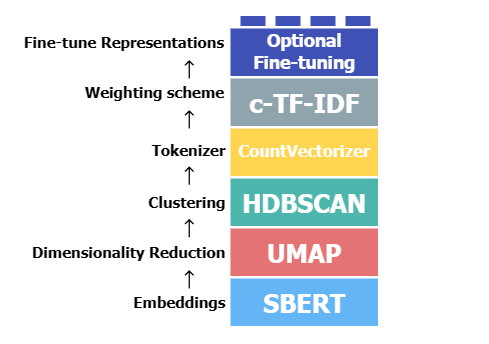



虽然这些步骤是默认步骤，但 BERTopic 有一些模块化。这个过程中的每个步骤都经过精心挑选，使它们在某种程度上彼此独立。

BERTopic 是相当模块化的，可以在各种子模型中保持其主题生成的质量。换句话说，BERTopic 本质上允许您构建自己的主题模型：

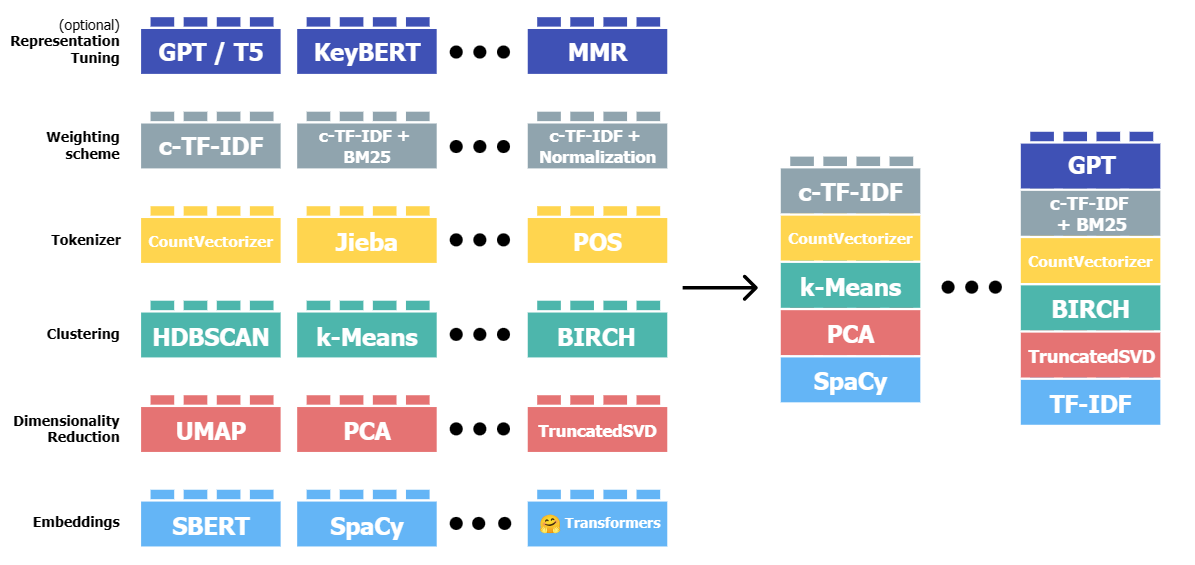

  **代码示例**：   
  ```python
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer


# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Step 2 - Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

# Step 3 - Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

# Step 4 - Tokenize topics
vectorizer_model = CountVectorizer(stop_words="english")

# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()

# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

# All steps together
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model # Step 6 - (Optional) Fine-tune topic represenations
)

```
### 1. 嵌入文档

我们首先将文档转换为数字表示。尽管有许多方法可以做到这一点，但BERTopic中的默认值是句子转换器。这些模型通常针对语义相似性进行了优化，这对我们的聚类任务有很大帮助。此外，它们非常适合创建文档或句子嵌入。
在 BERTopic 中，您可以选择任何句子转换器模型，但有两个模型设置为默认值：

"all-MiniLM-L6-v2"
"paraphrase-multilingual-MiniLM-L12-v2"
第一个是专门为语义相似性任务训练的英语语言模型，它工作得很好 适用于大多数用例。第二个模型与第一个模型非常相似，但一个主要区别是这些模型适用于 50+ 种语言。此模型比第一个模型大很多，只有在以下情况下才会选择该模型 您可以选择英语以外的任何语言。


BERTopic 随着任何新型号的发布而增长。 开箱即用，BERTopic 支持多种嵌入技术:
Sentence Transformers、
🤗 Hugging Face Transformers、
Flair、
Spacy、
Universal Sentence Encoder (USE)、
Gensim、
Scikit-Learn Embeddings、
OpenAI、
Cohere、
Multimodal、
Custom Backend、
Custom Embeddings、
TF-IDF

### 2.降维
在创建文档的数字表示之后，我们必须降低这些表示的维度。由于维度的诅咒，聚类模型通常难以处理高维数据。有一些很好的方法可以降低维数，例如PCA，但是在BERTopic中选择了默认的UMAP作为默认的UMAP。这是一种技术，可以在降低数据集的维数时保留数据集的某些局部和全局结构。

支持的降维技术包括：
UMAP、
PCA、
Truncated SVD、
cuML UMAP、
Skip dimensionality reduction


### 3. 聚类文档
降维后，我们可以开始对数据进行聚类。为此，我们利用基于密度的聚类技术HDBSCAN。它可以找到不同形状的簇，并具有在可能的情况下识别异常值的良好功能。因此，我们不会将文档强制放入它们可能不属于的集群中。这将改进生成的主题表示形式，因为要提取的噪声更少。

支持的聚类技术包括：
HDBSCAN、
k-Means、
Agglomerative Clustering、
cuML HDBSCAN

### 4. 词袋
在我们开始创建主题表示之前，我们首先需要选择一种允许BERTopic算法模块化的技术。当我们使用 HDBSCAN 作为聚类模型时，我们可能会假设我们的集群具有不同程度的密度和不同的形状。这意味着基于质心的主题表示技术可能不是最佳拟合模型。换句话说，我们想要一种主题表示技术，它对集群的预期结构几乎没有假设。
为此，我们首先将集群中的所有文档合并为一个文档。然后，该很长的文档表示群集。然后，我们可以计算每个单词在每个集群中出现的频率。这会产生一种称为词袋表示的东西，其中可以找到每个集群中每个单词的频率。因此，这种词袋表示形式是在集群级别而不是在文档级别。这种区别很重要，因为我们对主题级别（即集群级别）的单词感兴趣。通过使用词袋表示，不会对集群的结构做出任何假设。此外，词袋表示是 L1 规范化的，以考虑具有不同大小的集群。

### 5. 主题表示
从生成的词袋表示中，我们想知道是什么使一个集群与另一个集群不同。哪些词对于聚类 1 是典型的，而对于所有其他聚类来说不是那么多？为了解决这个问题，我们需要修改TF-IDF，使其考虑主题（即集群）而不是文档。

当您像往常一样在一组文档上应用 TF-IDF 时，您所做的是比较 文档之间的单词。现在，如果我们改为将单个类别（例如，集群）中的所有文档视为单个文档，然后应用 TF-IDF，该怎么办？结果将是聚类中单词的重要性分数。集群中重要的词越多，它就越能代表该主题。换句话说，如果我们提取每个集群中最重要的单词，我们就会得到主题的描述！此模型称为基于类的 TF-IDF：

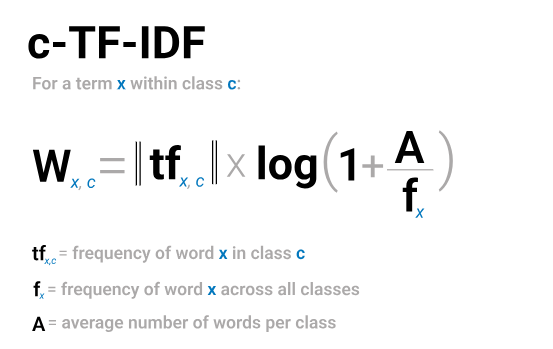

其他的表示方法：
bm25_weighting、
reduce_frequent_words

基于类的 BM-25 权重：

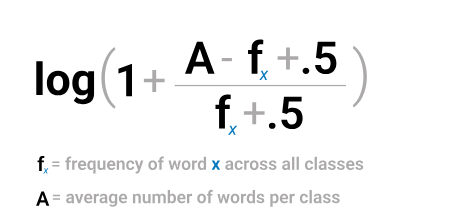

在较小的数据集中，此变体对停用词来说更稳健。
代码：
```python
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(bm25_weighting=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model )
```

基于reduce_frequent_words：

在对频率矩阵进行归一化后，我们取频率项的平方根：
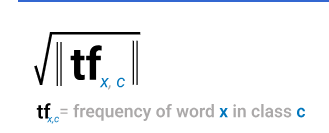

有些词经常出现在每个主题中，但通常不被视为列表中的停用词。为了进一步减少这些常用词，我们可以在应用加权方案后使用术语频率的平方根。

代码：
```python
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model = BERTopic(ctfidf_model=ctfidf_model )

```
### 6. （可选）微调主题表示
生成 c-TF-IDF 表示后，我们有一组描述文档集合的单词。c-TF-IDF 是一种可以快速生成准确主题表示的方法。然而，随着NLP世界的快速发展，每周都会发布令人兴奋的新方法。为了跟上正在发生的事情，有可能使用GPT，T5，KeyBERT，Spacy和其他技术进一步微调这些c-TF-IDF主题。

更具体地说，我们可以将 c-TF-IDF 生成的主题视为候选主题。它们每个都包含一组关键字和 我们可以用来进一步微调主题表示的代表性文档。拥有一套代表性文件 对于每个主题都是巨大的优势，因为它允许对少量的文档进行微调。这减少了计算量，因为它们只需要对每个主题的那一小部分代表性文档进行操作。结果， 像 GPT 和 T5 这样的大语言模型在生产环境中变得可行。

以下模型在可以中实现：bertopic.representation、
MaximalMarginalRelevance、
PartOfSpeech、
KeyBERTInspired、
ZeroShotClassification、
TextGeneration、
Cohere、
OpenAI、
LangChain



#### 优点
简单易用的超参调节：暴露了 UMAP 和 HDBSCAN 的超参，具体可以看调节超参的建议

模块解耦，更加灵活：语义表示模型、降维模型、聚类模型、主题表示模型、c-TF-IDF公式，这些子模块都是可以替换的，如聚类模型可以用 k-Means 或层次聚类，主题表示模型那里可以用 n_gram 词袋模型…

丰富的可视化API：主题的相似度、主题词的分布、主题的层次化结构…

更丰富的场景：提供主题模型的变体，如时序主题主题，半监督/有监督的主题模型，导向性主题模型等…

用上了预训练模型，表征能力强

把文档 embedding 编码跟主题表示分开来，更加灵活。embedding 这步是不需要去除停用词表这些操作的，而主题表示这一步由于用的是 bags-of-words，还是需要处理 stopwords/stemming/lemmatization的，而且可以试验 n-gram 等方式，由于跟文档编码分开了，所以不需要重新计算 embedding
#### 劣势
每个文档只分到一个topic，但实际情况下，部分文档涉及多个主题

主题表示那步用的 bags-of-words，可能会导致很多冗余词，想想假如某个主题表示是【好，棒，优秀，真好…】这些词，这就是冗余。这个问题其实 Top2Vec 也会出现，但论文里也提到了一种 maximal marginal relevance 的算法能减少主题表示的冗余度

In [ ]:
!pip3 install -i https://pypi.tuna.tsinghua.edu.cn/simple bertopic

In [ ]:
# Choose an embedding backend
!pip3 install -i https://pypi.tuna.tsinghua.edu.cn/simple bertopic[flair, gensim, spacy, use]

# Topic modeling with images
!pip3 install -i https://pypi.tuna.tsinghua.edu.cn/simple bertopic[vision]


In [38]:
import pandas as pd
import jieba
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer


df = pd.read_csv('明星信息1.csv', encoding='utf-8')


# df.dropna(subset=['judge'], inplace=True)



documents = df["judge_cut"]


# stopwords = [line.strip() for line in open('停用词表.txt',encoding='UTF-8').readlines()]


# def jieba_cut_remove_stopwords(text):
#     """结巴分词，并去除停用词
#     """
#     words = jieba.lcut(text)
#     results = []
#     for word in words:
#         # 去除停用词和空元素
#         if word not in stopwords and word.strip():
#             results.append(word)
#     return results

def cut(text):
    return text.split(" ")

vectorizer = CountVectorizer(tokenizer=cut, ngram_range=(1, 1))



In [39]:
# embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# import os
# os.environ['CURL_CA_BUNDLE'] = ''
###https://huggingface.co/下载到本地- paraphrase-multilingual-MiniLM-L12-v2
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")


topic_model = BERTopic(
                        embedding_model=embedding_model, 
                        language="Chinese-simple",
                      
                        vectorizer_model=vectorizer,
                        nr_topics="auto"#自动减少主题数量
                        )
topics, probs = topic_model.fit_transform(documents)

In [ ]:
# from bertopic import BERTopic

# # 加载模型
# topic_model = BERTopic.load("my_bert")


In [40]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,577,-1_评_中_角色_观众,"[评, 中, 角色, 观众, 演员, 表演, 中国, 娱乐, 形象, 电影]",[佟丽娅 微博照 佟丽娅 位 美丽 锡伯族 姑娘 艺术 浓厚兴趣 执着 追求 勤奋 刻苦 言...
1,0,107,0_中_评_角色_形象,"[中, 评, 角色, 形象, 观众, 里, 娱乐, 电视剧, 郭昶, 性格]",[陈数 才艺 气质 出众 镜头 前 眉梢 眼角 风情 饰演 角色 回味无穷 无论是 暗算 中...
2,1,73,1_评_性感_气质_中,"[评, 性感, 气质, 中, 身材, 赵薇, 时尚, 娱乐, 甜美, 可爱]",[陈语 安 外型 酷似 日本 女星 北川 景子 独特 清新 气质 姣好 身材 男生 喜欢 宅...
3,2,68,2_电影_香港_导演_中,"[电影, 香港, 导演, 中, 作品, 评, 文化, 影坛, 中国, 艺术]",[徐克 徐克 香港 武侠 电影 代表 人物 香港 华语 武侠 电影 导演 群中 举足轻重 地...
4,3,64,3_音乐_歌曲_演唱_评,"[音乐, 歌曲, 演唱, 评, 歌手, 声音, 嗓音, 评价, 歌声, 创作]",[华人 音乐 力量 听 侯旭 中国 东方 侯旭 新声 代 花样 美男 内地 乐坛 实力 宠儿...
5,4,47,4_评_中_导演_电影,"[评, 中, 导演, 电影, 胡歌, 王晓晨, 演技, 角色, 演员, 元奎]",[著名 影视 演员 李明 实力 导演 李海锋 执导 中视 传媒 股份 有限公司 投资 范明 ...
6,5,44,5_表演_评_演员_演技,"[表演, 评, 演员, 演技, 中, 角色, 饰演, 张默, 张一山, 观众]",[张世 演戏 享受 有种 说不出来 感觉 吸引 观众 目光 演出 太 自然 一点 痕迹 天平...
7,6,36,6_主持_主持人_新闻_节目,"[主持, 主持人, 新闻, 节目, 风格, 央视, 播音, 观众, 中, 播报]",[写真 图册 张纯烨 主持 风格 舒服 亲切 风趣 幽默 活力 性感 集合 台下 自然 清新...
8,7,34,7_评_中国_模特_气质,"[评, 中国, 模特, 气质, 娱乐, 身材, 车模, 宁辛, 时尚, 超模]",[张钧 甯 素有 台湾 第一 气质 美女 之称 高学历 冠以 演艺圈 女学霸 标签 一向 知...
9,8,31,8_齐达内_技术_球员_能力,"[齐达内, 技术, 球员, 能力, 评, 比赛, 体育, 传球, 扎卡, 足球]",[周琦 是从 后卫 几年 队里 身体 单薄 持续 对抗 能力差 未来 路 很长 宫鲁鸣 评 ...


In [41]:
topic_model.get_topic(0)

[('中', 0.04112773440282275),
 ('评', 0.02857389052303046),
 ('角色', 0.019936032032159462),
 ('形象', 0.017490249461191328),
 ('观众', 0.017300203508898847),
 ('里', 0.016088024152230186),
 ('娱乐', 0.01547994493237869),
 ('电视剧', 0.014669100118137823),
 ('郭昶', 0.014516661689950769),
 ('性格', 0.01355356868416589)]

In [42]:
topic_model.get_document_info(documents)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,登上 纽约时代广场 赵丽颖 一位 人气 实力 兼具 演员 清丽 可爱 外貌 深得 观众 喜欢...,-1,-1_评_中_角色_观众,"[评, 中, 角色, 观众, 演员, 表演, 中国, 娱乐, 形象, 电影]",[佟丽娅 微博照 佟丽娅 位 美丽 锡伯族 姑娘 艺术 浓厚兴趣 执着 追求 勤奋 刻苦 言...,评 - 中 - 角色 - 观众 - 演员 - 表演 - 中国 - 娱乐 - 形象 - 电影,0.000000,False
1,离婚 碰上 天后 告白 碰到 恒大 汪峰 注定 一生 抢镜 汪峰 歌 铿锵有力 演员 李晨评...,-1,-1_评_中_角色_观众,"[评, 中, 角色, 观众, 演员, 表演, 中国, 娱乐, 形象, 电影]",[佟丽娅 微博照 佟丽娅 位 美丽 锡伯族 姑娘 艺术 浓厚兴趣 执着 追求 勤奋 刻苦 言...,评 - 中 - 角色 - 观众 - 演员 - 表演 - 中国 - 娱乐 - 形象 - 电影,0.000000,False
2,沈腾 写真 剧照 沈腾 思维 灵敏 语言 犀利 幽默 笑 帅气 脸上 自觉 几条 可爱 褶皱...,-1,-1_评_中_角色_观众,"[评, 中, 角色, 观众, 演员, 表演, 中国, 娱乐, 形象, 电影]",[佟丽娅 微博照 佟丽娅 位 美丽 锡伯族 姑娘 艺术 浓厚兴趣 执着 追求 勤奋 刻苦 言...,评 - 中 - 角色 - 观众 - 演员 - 表演 - 中国 - 娱乐 - 形象 - 电影,0.000000,False
3,黄秋生 香港 影坛 异类 香港 商业 土壤 中 诞生 一位 实力派 人物 令人 庆幸 那种 ...,2,2_电影_香港_导演_中,"[电影, 香港, 导演, 中, 作品, 评, 文化, 影坛, 中国, 艺术]",[徐克 徐克 香港 武侠 电影 代表 人物 香港 华语 武侠 电影 导演 群中 举足轻重 地...,电影 - 香港 - 导演 - 中 - 作品 - 评 - 文化 - 影坛 - 中国 - 艺术,0.602165,False
4,郑伊健 唯一 长发 好看 男子 唱歌 慢 声底 试放 多些 时间 练声 练唱 早已 上位 跳...,2,2_电影_香港_导演_中,"[电影, 香港, 导演, 中, 作品, 评, 文化, 影坛, 中国, 艺术]",[徐克 徐克 香港 武侠 电影 代表 人物 香港 华语 武侠 电影 导演 群中 举足轻重 地...,电影 - 香港 - 导演 - 中 - 作品 - 评 - 文化 - 影坛 - 中国 - 艺术,0.419836,False
...,...,...,...,...,...,...,...,...
1159,美在 花城 决赛 选手 中 赵荣长 最矮 66 米 美在 花城 历届 女 冠军 中 最矮 容...,7,7_评_中国_模特_气质,"[评, 中国, 模特, 气质, 娱乐, 身材, 车模, 宁辛, 时尚, 超模]",[张钧 甯 素有 台湾 第一 气质 美女 之称 高学历 冠以 演艺圈 女学霸 标签 一向 知...,评 - 中国 - 模特 - 气质 - 娱乐 - 身材 - 车模 - 宁辛 - 时尚 - 超模,0.958798,False
1160,李成儒 大器晚成 型 演员 演戏 投入 生活 北京 爷们 本色 演出 成功 马丁 评 10 ...,-1,-1_评_中_角色_观众,"[评, 中, 角色, 观众, 演员, 表演, 中国, 娱乐, 形象, 电影]",[佟丽娅 微博照 佟丽娅 位 美丽 锡伯族 姑娘 艺术 浓厚兴趣 执着 追求 勤奋 刻苦 言...,评 - 中 - 角色 - 观众 - 演员 - 表演 - 中国 - 娱乐 - 形象 - 电影,0.000000,False
1161,龚海铭 毕业 上海戏剧学院 龚海铭 拥有 酷似 黄晓明 帅气 外形 冠以 黄晓明 之称 荧屏...,-1,-1_评_中_角色_观众,"[评, 中, 角色, 观众, 演员, 表演, 中国, 娱乐, 形象, 电影]",[佟丽娅 微博照 佟丽娅 位 美丽 锡伯族 姑娘 艺术 浓厚兴趣 执着 追求 勤奋 刻苦 言...,评 - 中 - 角色 - 观众 - 演员 - 表演 - 中国 - 娱乐 - 形象 - 电影,0.000000,False
1162,潘仪 君 台湾 全能型 女艺人 唱歌 演戏 主持 样样精通 演戏 一块 潘仪 君 饰演 19...,-1,-1_评_中_角色_观众,"[评, 中, 角色, 观众, 演员, 表演, 中国, 娱乐, 形象, 电影]",[佟丽娅 微博照 佟丽娅 位 美丽 锡伯族 姑娘 艺术 浓厚兴趣 执着 追求 勤奋 刻苦 言...,评 - 中 - 角色 - 观众 - 演员 - 表演 - 中国 - 娱乐 - 形象 - 电影,0.000000,False


In [43]:
##话题间距离的可视化
topic_model.visualize_topics()

In [44]:
##主题词条形图可视化
topic_model.visualize_barchart()


In [45]:
#为了理解主题的潜在层次结构，我们可以使用 scipy.cluster.hierarchy 创建聚类并可视化它们之间的关系。这有助于合并相似主题，达到降低主题模型主题数量nr_topics。
topic_model.visualize_hierarchy()

In [46]:
## BERTopic可将主题以embeddings形式（向量）表示， 因此我们可以应用余弦相似度来创建相似度矩阵。每两两主题可进行余弦计算，最终结果将是一个矩阵，显示主题间的相似程度。
topic_model.visualize_heatmap(n_clusters=10, width=1000, height=1000)

In [47]:
topic_model.save("my_bert") 

In [54]:
from gensim import corpora
from gensim.models import CoherenceModel

# 假设我们已经有了一个 BERTopic 模型实例 "bertopic_model"
# 获取主题及其相关的词汇和概率
topics = topic_model.get_topics()

# 将主题转化为仅包含词汇的列表
topic_words_list = [[word for word, _ in words_probs] for _, words_probs in topics.items()]

# 假设我们的文档列表名为 "documents"
# texts = [doc.split() for doc in documents]
# dictionary = corpora.Dictionary(texts)

texts = [[word for word in text.split(' ') ] for text in df['judge_cut']]
# print(texts)
# 构建词典
dictionary = corpora.Dictionary(texts)


# 使用 Gensim 的 CoherenceModel 计算 coherence
coherence_model = CoherenceModel(topics=topic_words_list, texts=texts, dictionary=dictionary, coherence='c_v')
coherence = coherence_model.get_coherence()

# 计算 diversity
def compute_diversity(topics):
    num_topics = len(topics)
    topic_sets = [set(topic) for topic in topics]
    total_pairs = num_topics * (num_topics - 1) / 2
    overlapping_word_count = sum(len(topic_sets[i].intersection(topic_sets[j])) for i in range(num_topics) for j in range(i+1, num_topics))
    # diversity is defined as 1 minus average overlap
    diversity = 1 - overlapping_word_count / (10 * total_pairs)  # assuming each topic has 10 words
    return diversity

diversity = compute_diversity(topic_words_list)

coherence, diversity



(0.5164710096916436, 0.8285714285714285)

|           |   LDA    | Topic2vec| Bertopic |
|---------- |----------|:--------:|---------:|
| coherence | 0.420320 | 0.343654 | 0.51647  |
| diversity | 0.4      | -0.09047 | 0.82857  |



